# Task 8.1. Basic morphological operations
---
***Author: Piotr Skalski***

## 1. Imports

In [1]:
import numpy as np
import cv2
import os
import pprint
from tqdm import tqdm

import display_util

import matplotlib.pyplot as plt
%matplotlib inline

## 2. Primary settings

In [61]:
SOURCE_DIR = "./../data/"
IMAGE_NAMES = [
    "ertka.bmp",
    "buzka.bmp",
    "kolka.bmp",
    "wyspa.bmp",
    "hom.bmp"
]

## 3. Loading images

In [62]:
# building paths to images
images_paths = [os.path.join(SOURCE_DIR, file) for file in IMAGE_NAMES]
# loading files
images = [cv2.imread(path, 0) for path in images_paths]

### 3.1 Data overview

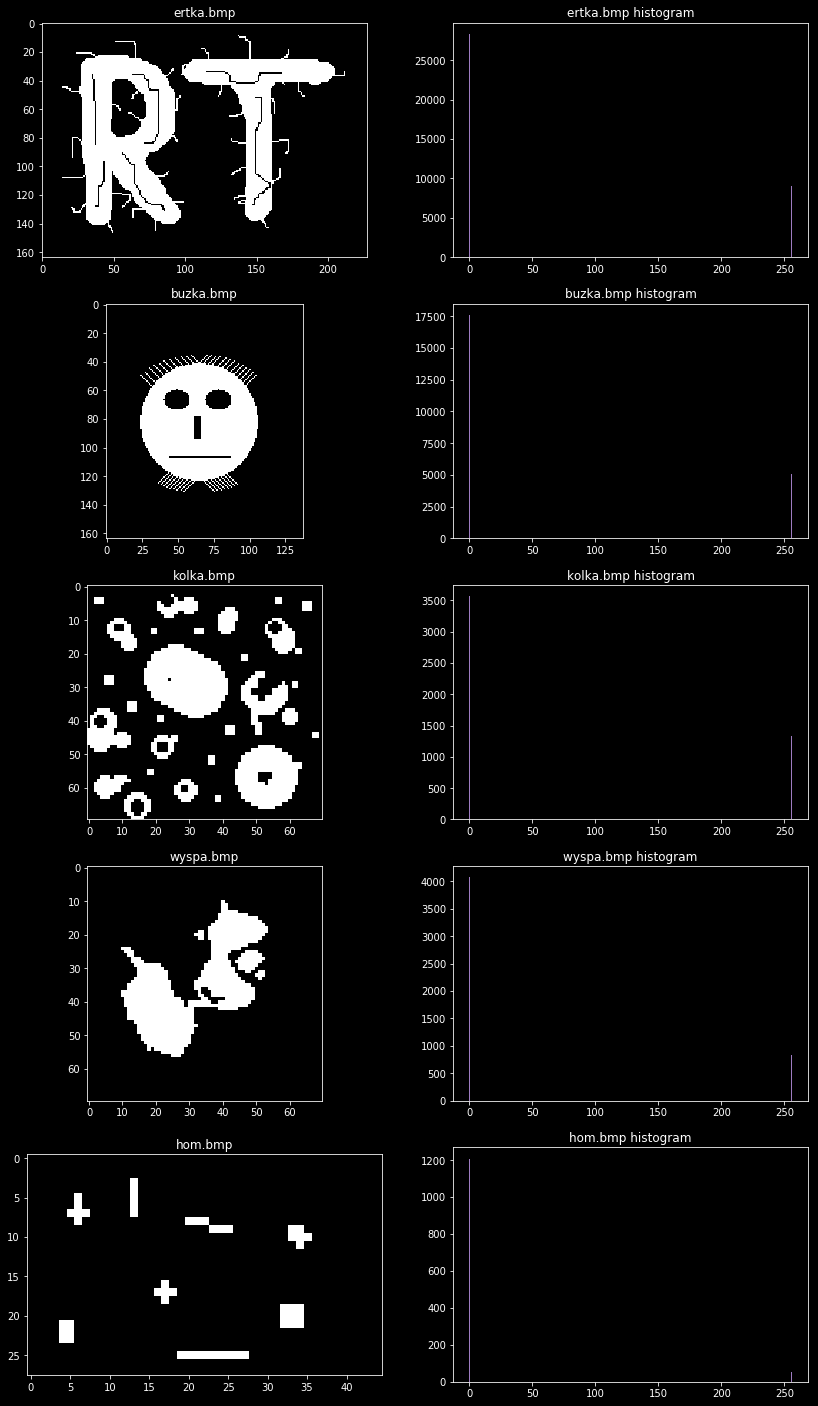

In [63]:
display_util.images_with_histograms(files_list=images, names_list=IMAGE_NAMES)

## 4. Erosion

### 4.1. Local settings

In [5]:
KERNEL_SHAPE = (3, 3)
IMAGE = images[0]

### 4.2. Use of the built-in erode function - the equivalent of matlab imerode

In [10]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, KERNEL_SHAPE)
image_eroded_1 = cv2.erode(IMAGE, kernel, iterations = 1)
image_eroded_2 = cv2.erode(IMAGE, kernel, iterations = 2)
image_eroded_3 = cv2.erode(IMAGE, kernel, iterations = 3)

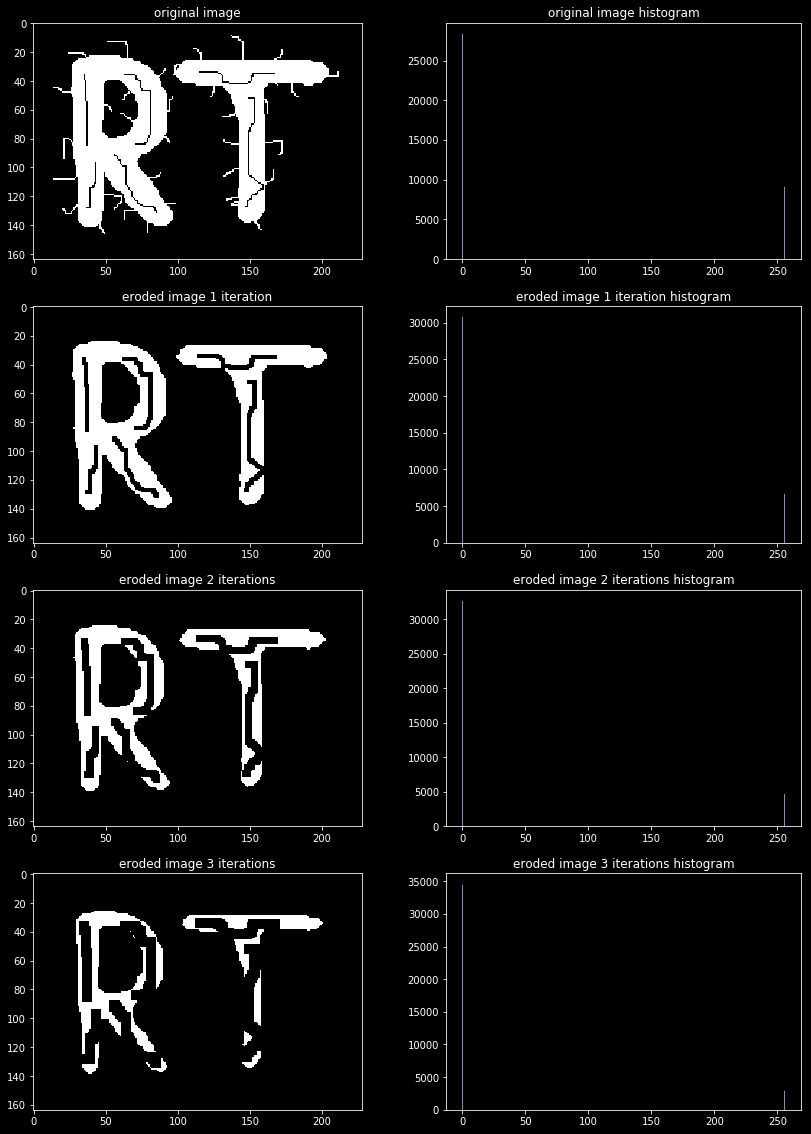

In [11]:
images_to_display = [
    IMAGE,
    image_eroded_1,
    image_eroded_2,
    image_eroded_3
]
images_names = [
    "original image",
    "eroded image 1 iteration",
    "eroded image 2 iterations",
    "eroded image 3 iterations"
]
display_util.images_with_histograms(files_list=images_to_display, names_list=images_names)

### 4.3. Selecting a kernel to remove hair that runs diagonally to the left 

In [27]:
IMAGE = images[1]
SELECTED_KERNEL = np.asarray([
    [1, 0],
    [0, 1]
], np.uint8)
image_eroded = cv2.erode(IMAGE, SELECTED_KERNEL, iterations = 1)

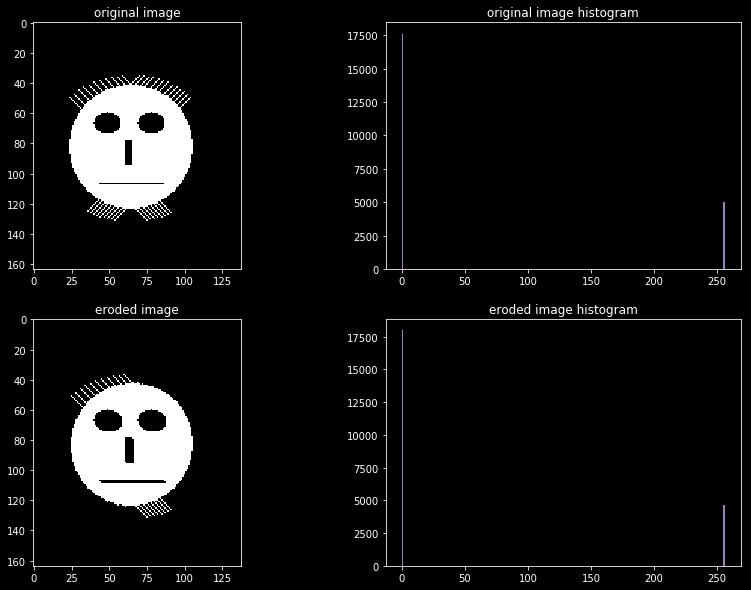

In [28]:
images_to_display = [
    IMAGE,
    image_eroded
]
images_names = [
    "original image",
    "eroded image"
]
display_util.images_with_histograms(files_list=images_to_display, names_list=images_names)

## 5. Dilation and others built-in functions 

### 5.1. Local settings

In [32]:
KERNEL_SHAPE = (3, 3)
IMAGE = images[0]

### 5.2. Use of the built-in functions

In [36]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, KERNEL_SHAPE)
image_erode = cv2.erode(IMAGE, kernel, iterations = 1)
image_dilate = cv2.dilate(IMAGE, kernel, iterations = 1)
image_opening = cv2.morphologyEx(IMAGE, cv2.MORPH_OPEN, kernel)
image_closing = cv2.morphologyEx(IMAGE, cv2.MORPH_CLOSE, kernel)

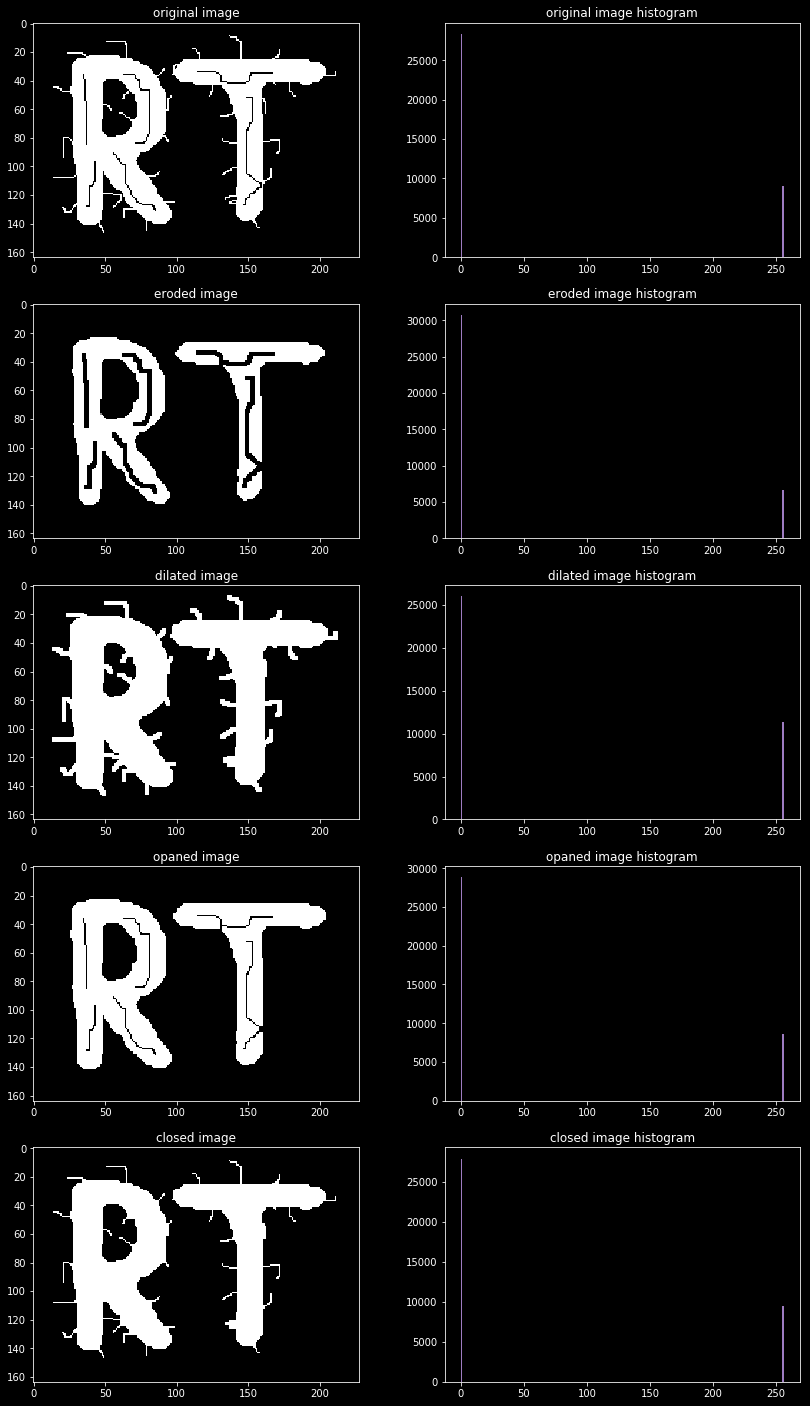

In [37]:
images_to_display = [
    IMAGE,
    image_erode,
    image_dilate,
    image_opening,
    image_closing
]
images_names = [
    "original image",
    "eroded image",
    "dilated image",
    "opaned image",
    "closed image"
]
display_util.images_with_histograms(files_list=images_to_display, names_list=images_names)

## 6. Eliminate cracks and holes in the ertka.bmp image

### 6.1. Local settings

In [54]:
KERNEL_SHAPE = (3, 3)
KERNEL_SHAPE_2 = (5, 5)
IMAGE = images[0]

### 6.2. Implementation

In [59]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, KERNEL_SHAPE)
kernel_2 = cv2.getStructuringElement(cv2.MORPH_RECT, KERNEL_SHAPE_2)
image_out = cv2.morphologyEx(IMAGE, cv2.MORPH_OPEN, kernel)
image_out = cv2.dilate(image_out, kernel_2, iterations = 1)
image_out = cv2.erode(image_out, kernel_2, iterations = 1)

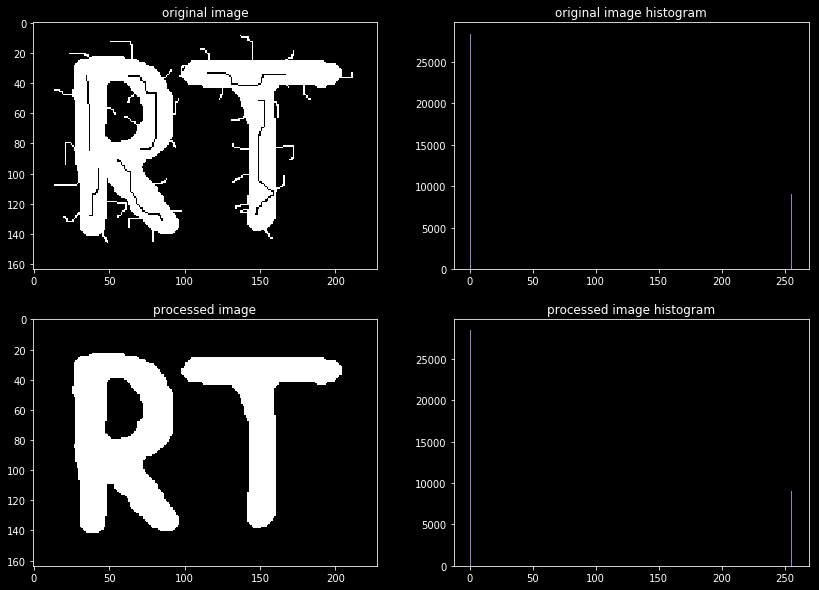

In [60]:
images_to_display = [
    IMAGE,
    image_out
]
images_names = [
    "original image",
    "processed image"
]
display_util.images_with_histograms(files_list=images_to_display, names_list=images_names)

## 7. Hit or miss

### 7.1. Local settings

In [65]:
IMAGE = images[4]
S1 = np.asarray([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
])
S2 = np.asarray([
    [1, 0, 1],
    [0, 0, 0],
    [1, 0, 1]
])

### 7.2. Use of the built-in morphologyEx function with cv.MORPH_HITMISS - equivalent of matlab bwhitmiss

In [66]:
image_out_S1 = cv2.morphologyEx(IMAGE, cv2.MORPH_HITMISS, S1)
image_out_S2 = cv2.morphologyEx(IMAGE, cv2.MORPH_HITMISS, S2)

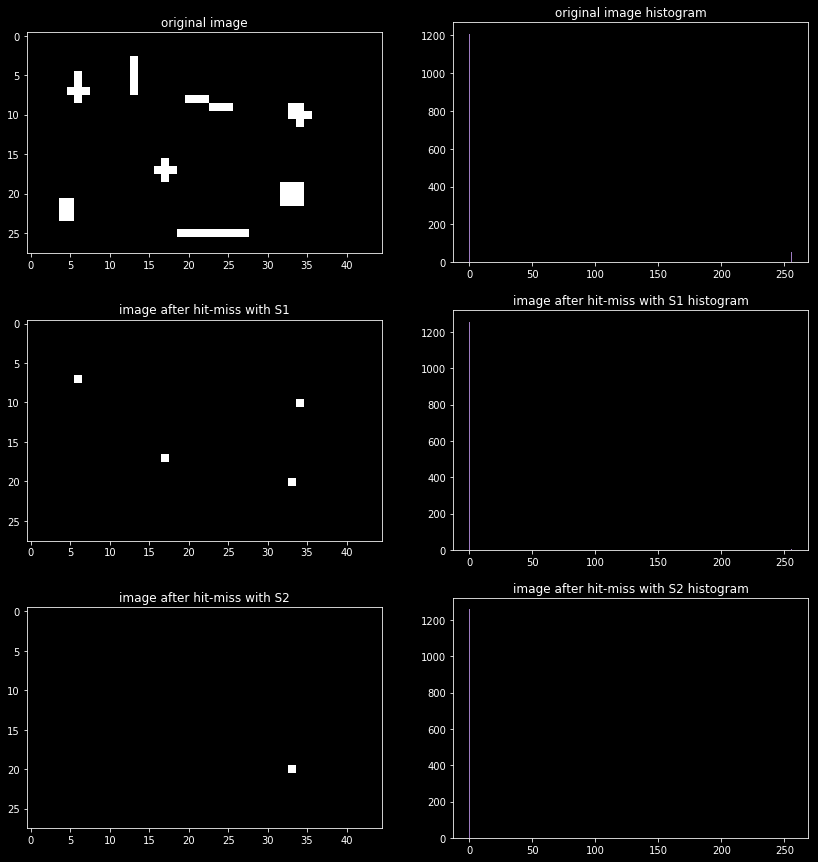

In [67]:
images_to_display = [
    IMAGE,
    image_out_S1,
    image_out_S2
]
images_names = [
    "original image",
    "image after hit-miss with S1",
    "image after hit-miss with S2"
]
display_util.images_with_histograms(files_list=images_to_display, names_list=images_names)

## Resources

1. [Morphological Transformations](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html)
2. [Morphology](http://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm)
3. [Hit-or-Miss]()